In [9]:
import sympy as sp
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time 


In [4]:
from sympy import *

def grad(x):
    x1,y1 = x[0],x[1]
    
    x, z = symbols('x z')

    d_x = diff((x**2 )/( 5*z**3) *z**2, x)
    d_y = diff((x**2 )/( 5*z**3) *z**2, z)
    
    diff_x = d_x.evalf(subs={x:x1, z:y1})
    diff_y = d_y.evalf(subs={x:x1, z:y1})
    
    return np.array([diff_x , diff_y])

    
def grad_run(w):
    anti_grad = grad(w) * -1 
    
    grad1 = grad(w) 
    iter1 = 1
    while (grad1[0] != 0) and (grad1[1] != 0) and (iter1 != 100000):
        w = w + (anti_grad * 0.0001)
        iter1 +=1
    return w,grad(w)

In [70]:
grad_run(np.array([5,6]))

(array([1.66669999998038, 7.38887499998689], dtype=object),
 array([0.0902275380207861, -0.0101762607716155], dtype=object))

/tmp/ipykernel_10136/1945356491.py:38: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


3.466027239772353 2.3015541663717176
-8.525388427755829 -5.5904432240437485
32.49709291865965 21.480698333455795
-108.31783799631953 -71.36881772716949
374.55068121941054 247.09991879072737
-1281.7689756802454 -845.2196247649997
4399.149455983625 2901.3507291137357
-15086.070551008888 -9949.08016800802
51746.52592408944 34126.86222811309
-177484.01836717426 -117050.05580743891
608758.0819658674 401474.56039968744
-2087988.9402662613 -1377022.971395249
7161635.28399994 4723079.856768129
-24563828.562485114 -16199779.929828713
84251948.73041335 55563938.49793897
-288977374.8438356 -190579816.93431848
991169046.5394008 653673374.8847747
-3399629738.4702873 -2242046854.299674
11660455301.290258 7690039547.002843
-39994419475.23912 -26376214260.489155
137177627104.90788 90468283621.08954
-470508176514.7071 -310298902649.1848
1613805026660.912 1064300162800.8372
-5535220840088.149 -3650463559051.8438
18985360215377.504 12520795036719.682
-65118251452079.56 -42945315249832.14
223350340687327.

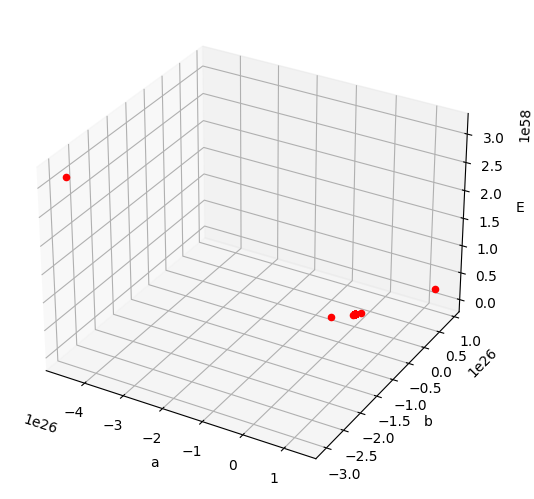

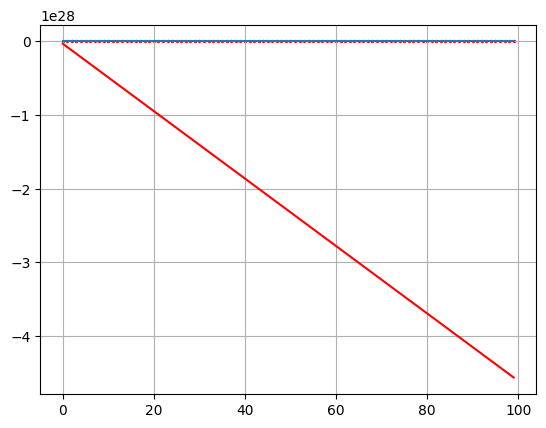

In [10]:

def E(y, w0, w1):
    #строим прямую из точек
    ff = np.array([w0 + w1 * x for x in range(N)])
    return np.dot((y-ff).T, (y-ff))

#частная производная по w0
def dew0(y,w0,w1):
    ff = np.array([w0 + w1 * x for x in range(N)])
    return -2 * np.dot((y-ff).T, range(N))

#частная производная по w1
def dew1(y,w0,w1):
    ff = np.array([w0 + w1 * x for x in range(N)])
    return -2 * (y-ff).sum()


N = 100 # количество точек 
niter = 50 # количество итераций алгоритма 
sigma = 3 # стандартное отколнение 
w1 = 0.5 # угловой коэффициент прямой 
w0 = 2 # смещение прямой 

ww0 = 0 # целевые значения частных производных 
ww1 = 0

alpha1 = 0.00001 # шаг алгоритма  
alpha2 = 0.0005 

f = np.array([w1*z+w0 for z in range(N)])
y = np.array(f + np.random.normal(0, sigma, N))

a_plt = np.arange(-1, 2, 0.1)
b_plt = np.arange(0, 3, 0.1)
E_plt = np.array([[E(y, a, b) for a in a_plt] for b in b_plt])

plt.ion()   # включение интерактивного режима отображения графиков
fig = plt.figure()
ax = Axes3D(fig)

a, b = np.meshgrid(a_plt, b_plt)
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')

point = ax.scatter(ww0, ww1, E(y, ww0, ww1), c='red')  # отображение точки красным цветом

for n in range(niter):
    ww0 = ww0 - alpha1 * dew0(y, ww0, ww1)
    ww1 = ww1 - alpha2 * dew1(y, ww0, ww1)

    ax.scatter(ww0, ww1, E(y, ww0, ww1), c='red')

    # перерисовка графика и задержка на 10 мс
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.01)

    print(ww0, ww1)

plt.ioff()   # выключение интерактивного режима отображения графиков
plt.show()

# отображение графиков аппроксимации
ff = np.array([ww0*z+ww1 for z in range(N)])

plt.scatter(range(N), y, s=2, c='red')
plt.plot(f)
plt.plot(ff, c='red')
plt.grid(True)
plt.show()